In [3]:
import numpy             as np
import matplotlib.pyplot as plt
from matplotlib          import rc 
from scipy.optimize      import curve_fit
import os
from scipy              import integrate
import math

In [2]:
from IPython.display import IFrame, display
file = 'Lectures/Cuadratura_Gaussiana.pdf'
IFrame(file, width=600, height=400)

In [32]:
deg = 5
x, w = np.polynomial.legendre.leggauss(deg)
print(x, w)

(array([-0.90617985, -0.53846931,  0.        ,  0.53846931,  0.90617985]), array([0.23692689, 0.47862867, 0.56888889, 0.47862867, 0.23692689]))


In [28]:
a = 0
b = 0.5*np.pi
f = lambda x : np.cos(x)
print(f(0.))

1.0


In [33]:
t = 0.5*( (b-a)*x + a + b )
Integral = 0.5*(b-a)*sum( w*f(t) )
print(Integral)

1.000000000039565


In [34]:
import sympy as sym

In [50]:
x = sym.Symbol('x', real=True)
funcion   = sym.sqrt(x**2+1)
dfuncion  = sym.diff(funcion,x)
d2funcion = sym.diff(dfuncion, x)
print(funcion, dfuncion, d2funcion)

(sqrt(x**2 + 1), x/sqrt(x**2 + 1), -x**2/(x**2 + 1)**(3/2) + 1/sqrt(x**2 + 1))


In [51]:
# para usarlas númericamente
fn   = sym.lambdify([x], funcion,  'numpy') 
dfn  = sym.lambdify([x], dfuncion, 'numpy') 
d2fn = sym.lambdify([x], d2funcion,'numpy') 

In [42]:
x = np.linspace(0,3,20)

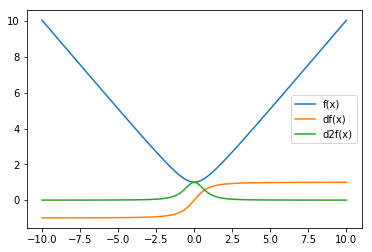

In [52]:
x = np.linspace(-10,10,100)
plt.plot(x,fn(x),x,dfn(x),x,d2fn(x))
plt.legend(['f(x)','df(x)','d2f(x)'])
plt.show()

In [53]:
def CreateLegendPoly(n):
    x = sym.Symbol('x', real=True)
    y = sym.Symbol('y', real=True)
    
    y = (x**2 -1)**n
    poly = sym.diff(y,x,n)/( 2**n * math.factorial(n))
    
    return poly

In [54]:
poly2 = CreateLegendPoly(2)
print(poly2)

(3*x**2 - 1)/2


In [55]:
for i in range(0,10):
    print(CreateLegendPoly(i))

1
x
(3*x**2 - 1)/2
x*(5*x**2 - 3)/2
(8*x**4 + 24*x**2*(x**2 - 1) + 3*(x**2 - 1)**2)/8
x*(8*x**4 + 40*x**2*(x**2 - 1) + 15*(x**2 - 1)**2)/8
(16*x**6 + 120*x**4*(x**2 - 1) + 90*x**2*(x**2 - 1)**2 + 5*(x**2 - 1)**3)/16
x*(16*x**6 + 168*x**4*(x**2 - 1) + 210*x**2*(x**2 - 1)**2 + 35*(x**2 - 1)**3)/16
(128*x**8 + 1792*x**6*(x**2 - 1) + 3360*x**4*(x**2 - 1)**2 + 1120*x**2*(x**2 - 1)**3 + 35*(x**2 - 1)**4)/128
x*(128*x**8 + 2304*x**6*(x**2 - 1) + 6048*x**4*(x**2 - 1)**2 + 3360*x**2*(x**2 - 1)**3 + 315*(x**2 - 1)**4)/128
